In [2]:
!pip install --upgrade wandb

In [3]:
import wandb
from wandb.integration.keras import WandbCallback  # ← updated path

wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: kavyareddy7702 (kavyareddy7702-vit-ap-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
!pip install wandb
import wandb
import keras
import tensorflow as tf
import numpy as np
from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense # Keras is also a popular machine learning library - it runs on TensorFlow, making it easier to build models.
import matplotlib.pyplot as plt # matplotlib handles graphing
from wandb.integration.keras import WandbCallback

wandb.login()
wandb.init(project="synth-data-normal", config={"hyper": "parameter"})

In [5]:
!pip install scikit-learn pydbgen

import sklearn
import pydbgen
from sklearn import svm
from sklearn.datasets import make_classification, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
wandb.log({"chart": plt})

clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probas = clf.predict_proba(X_test)

wandb.sklearn.plot_classifier(clf, X_train, X_test, y_train, y_test, y_pred = y_pred, y_probas=y_probas, labels=['1','2'], model_name='SVC', feature_names=None)


wandb: 
wandb: Plotting SVC.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


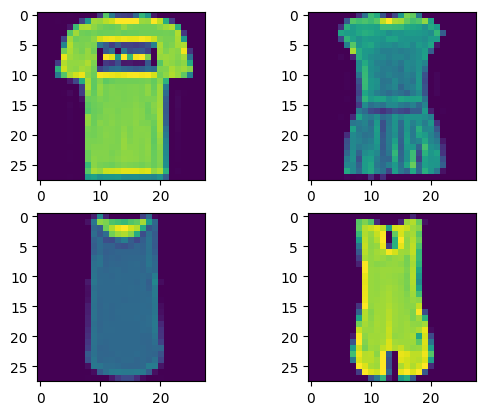

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

example = np.rot90(x_train[0])
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.squeeze(x_train[1,:,:]))
axs[1, 0].imshow(np.squeeze(x_train[2,:,:]))
axs[0, 1].imshow(np.squeeze(x_train[3,:,:]))
axs[1, 1].imshow(np.squeeze(x_train[4,:,:]))
plt.show()

wandb.log({"example_ims": fig})

In [9]:
print(x_train.shape, y_train.shape)
model = Sequential()
model.add(Conv2D(input_shape=(28,28, 1),filters=4, kernel_size=4, strides=2, padding='same'))
model.add(Conv2D(filters=4, kernel_size=4, strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(opt, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)



(60000, 28, 28, 1) (60000, 10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 4)      │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 4)        │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,298 (8.98 KB)

 Trainable params: 2,298 (8.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - acc: 0.4070 - loss: 1.6200 - val_acc: 0.7148 - val_loss: 0.7607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - acc: 0.7401 - loss: 0.7057 - val_acc: 0.7595 - val_loss: 0.6546
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.7740 - loss: 0.6284 - val_acc: 0.7793 - val_loss: 0.6107
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - acc: 0.7939 - loss: 0.5783 - val_acc: 0.7900 - val_loss: 0.5811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - acc: 0.8058 - loss: 0.5512 - val_acc: 0.7950 - val_loss: 0.5640
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.8090 - loss: 0.5428 - val_acc: 0.8018 - val_loss: 0.5495
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - acc: 0.8169 - loss: 0.5184 - val_acc: 0.8044 - val_loss: 0.5428
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.8190 - loss: 0.5124 - val_acc: 0.8065 - val_loss: 0.5351
Epoch 9/10
1875/1875 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1


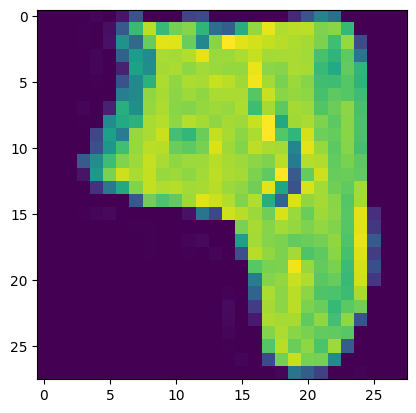

In [13]:
print(np.argmax(model.predict( example[np.newaxis, :, :, np.newaxis])))
plt.figure()
plt.imshow(np.squeeze(example))

wandb.log({"example_rot": fig})

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=180, data_format="channels_first")
datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

print(np.argmax(model.predict(example[np.newaxis, :, :, np.newaxis])))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - acc: 0.4094 - loss: 1.6310 - val_acc: 0.6243 - val_loss: 1.1500
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - acc: 0.4095 - loss: 1.6426 - val_acc: 0.6354 - val_loss: 1.1404
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - acc: 0.4113 - loss: 1.6254 - val_acc: 0.6270 - val_loss: 1.1497
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - acc: 0.4119 - loss: 1.6185 - val_acc: 0.6267 - val_loss: 1.1448
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - acc: 0.4169 - loss: 1.6267 - val_acc: 0.6296 - val_loss: 1.1509
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 45ms/step - acc: 0.4116 - loss: 1.6198 - val_acc: 0.6255 - val_loss: 1.1517
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - acc: 0.4118 - loss: 1.6242 - val_acc: 0.6319 - val_loss: 1.1609
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - acc: 0.4092 - loss: 1.6268 - val_acc: 0.6230 - val_loss: 1.1722
Epoch 9/10
1875/1875 ━━

In [23]:
print(np.argmax(model.predict(example[np.newaxis, :, :, np.newaxis])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1
